# Basis Expansion for Wine Taste Prediction


In [6]:
import matplotlib.pyplot as plt
from math import cos, log, sqrt
import seaborn as sns
import os

sns.set()

In [7]:
x_list = []
labels = []
names = []
first_line = True
data_path = './data/winequality-red.csv'

with open(data_path) as data:
    
    for line in data:
        
        if first_line:
            names = line.strip().split(';')
            first_line = False
            
        else:
            # split on semicolon
            row = line.strip().split(';')
            
            # put labels in separate array
            labels.append(float(row[-1]))
            
            # remove label from row
            row.pop()
            
            # convert row to floats
            float_row = [float(num) for num in row]
            x_list.append(float_row)

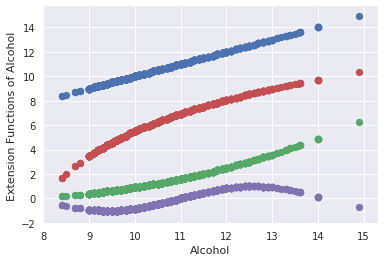

In [8]:
# extend the alcohol variable (the last colum in that attribute matrix)
x_extended = []
alch_col = len(x_list[1])

for row in x_list:
    new_row = list(row)
    alch = row[alch_col -1]
    new_row.append((alch -7) * (alch - 7)/10)
    new_row.append(5 * log(alch - 7))
    new_row.append(cos(alch))
    x_extended.append(new_row)
    
n_row = len(x_list)
v1 = [x_extended[j][alch_col - 1] for j in range(n_row)]

for i in range(4):
    v2 = [x_extended[j][alch_col - 1 + i] for j in range(n_row)]
    plt.scatter(v1, v2)
    
plt.xlabel('Alcohol')
plt.ylabel('Extension Functions of Alcohol')
plt.show()